<div style="text-align: center">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png"> </td>
     <td style="background-color:transparent;"><a href="https://www.sidetrade.com/">
  </tr>
</table> 
</div>

# <a style="color:#0131B4"> DataCamp Project : </a>
# <a style="color:#0131B4">Helping Health Inspectors calculate restaurant score in San Francisco</a>

<img src="reports/figures/grades.png" height="450" width="450">

####  <a style="color:#0131B4"> Authors : Emma Demarecaux, Charles Desaleux, Romain Fabre, Julien Lenhardt, Luz Pascal, Benjamin Wallyn</a>

# <a style="color:#0131B4">  General Outline</a>

##  <a href="#I.-Business-case" style="color:#0131B4"> I. Business case</a>

1. Business case presentation 
2. KPIs 
3. Data 
4. Business metric

##  <a href="#II.-Exploratory-Data-Analysis" style="color:#0131B4"> II. Exploratory Data Analysis </a>

##  <a href="#III.-Workflow" style="color:#0131B4"> III. Workflow</a>

1. Feature Extractor
2. Regressor
3. Evaluation
4. Cross-Validation

##  <a href="#IV.-Submission" style="color:#0131B4"> IV. Submission</a>

#  <a style="color:#0131B4">I. Business case</a>

## <a style="color:#0131B4">1. Business case presentation</a>
*How Restaurant Health Inspections Work?*

The Health Department has developed an inspection report and scoring system. After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. Violations can fall into:
- **High risk category**: records specific violations that directly relate to the transmission of food borne illnesses, the adulteration of food products and the contamination of food-contact surfaces;
- **Moderate risk category**: records specific violations that are of a moderate risk to the public health and safety;
- **Low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

The score card that will be issued by the inspector is maintained at the food establishment and is available to the public in this dataset. We will focus on San Francisco's LIVES restaurant inspection data. In 2012, Yelp partnered with the City of San Francisco and City of New York to develop the *Local Inspector Value-Entry Specification* (LIVES). LIVES is an open data standard which allows municipalities to publish restaurant inspection information to Yelp.

A health inspector is allowed to visit your venue at any reasonable time without notice. As part of their job, they're obligated to do a certain number of inspections a year (once every six months is common), but they're also required to do an inspection if a customer complains. 

The highest grade ('A') is earned if the restaurant is clean, up to code, and free of violations, a 'B' means that the restaurant is clean, but has some minor issues that needs to be fixed and a 'C' means the restaurant shouldn't be open.

The health score goes from 0 to 100. A perfect score is 100. For states and counties that use the letter-grade system, a 90-to-100 point score is an A, 80 to 89 is a B and so forth. Some cities and states require the restaurant to prominently display its most recent grade.

Public health inspectors look for health and safety hazards in restaurants. They inspect workplaces to ensure equipment, materials and processes are safe, develop, implement and evaluate health and safety programs and strategies.

Grade pending means that the restaurant got either a B or a C. The restaurant can contest the grade, and while it's waiting for a hearing, it can post the grade it received or the "Grade Pending" sign. The restaurant's pending scores can be looked up online.

<img src="reports/figures/closed.jpg" height="400" width="400">

<a style="color:#0131B4">Our goal is to estimate the restaurant score in order to help health inspectors select places that may not respect the health quality needed for a restaurant.</a>

## <a style="color:#0131B4">2. KPIs</a>

*How can we measure the impact of our project?*

<img src="reports/figures/preparing_inspection.jpg" height="400" width="400">

Here are some indicators that might measure the impact of our project:

- Number of people with foodborne illnesses in San Francisco.
- Number of visits that result in a C score (meaning that the health inspectors didn't lose their time).
- Number of restaurants than maintain a clean record after an unscheduled inpection.

## <a style="color:#0131B4">3. Data</a>

### Restaurant Scores - LIVES Standard

This dataset was built from an extract of the [Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i?row_index=0) reference database of Restaurant Scores (LIVES Standard).

All of the columns associated with the listing of violations are optional. If a data provider does not collect or does not wish to provide details of violations, those columns can be blank or omitted.
- If the data provider includes violations then the dataset will have one record for each violation and the associated inspection and business information will be duplicated for each violation, but can be differentiated by their business_ids and inspection_ids. Any inspection that resulted in no violations can be represented as a single row for the inspection with blank data in the violations fields.
- If violations are not included then the dataset will have one record for each inspection and the associated business information will be duplicated for each inspection

The following information is provided in the columns:

* `business_id` - *number* - required - Unique identifier for the business. For many cities, this may be the license number.
* `business_name` - *string* - required - Common name of the business.
* `business_address` - *string* - required - Street address of the business. *Example: 706 Mission St*.
* `business_city` - *string* - required - City of the business. This field must be included if the file contains businesses from multiple cities.
* `business_state` - *string* - required - State or province for the business. In the U.S. this should be the two-letter code for the state.
* `business_postal_code` - *string* - not required - Zip code or other postal code.
* `business_latitude` - *number* - not required - Latitude of the business. This field must be a valid WGS 84 latitude. *Example: 37.7859547*.
* `business_longitude` - *number* - not required - Longitude of the business. This field must be a valid WGS 84 longitude. *Example: -122.4024658*.
* `business_location` - *location* - not required - If you wish to have geospatial API capabilities or wish to geocode addresses you should include this Location datatype column. *Example: POINT(-122.393089 37.778634)*.
* `business_phone_number` - *string* - not required - Phone number for a business including country specific dialing information.
* `inspection_id` - *string* - required - A unique identifier for a given inspection.
* `inspection_date` - *date* - required - Date of the inspection in YYYY-MM-DD format. *Example: 2015-08-22*.
* `inspection_score` - *number* - not required - Calculated inspection score, graded from 0 to 100. **Target score to predict**.
* `inspection_type` - *string* - not required - String representing the type of inspection. Must be one of: initial, routine, unscheduled, follow-up, complaint.
* `violation_id` - *string* - not required - A unique identifier for a given violation.
* `violation_description` - *string* - not required - One line description of the violation. If violation data is provided then this field is required.
* `risk_category` - *string* - not required - This string represents the non-numeric result of the inspection: "Low Risk", "Moderate Risk" or "High Risk".


### Tripadvisor

In order to gain information on restaurants, we decided to scrap the restaurants on Tripadvisor for which we have an inspection score available. Our goal is to predict that score from the information available on Tripadvisor in order to help Health Inspectors decide whether or not to inspect a restaurant in San Francisco based on the predicted scores. We chose to use Tripadvisor data because it provides constumer insight that can be usesul to identifiy potential sanitary risks and violations. The scraping was done using the selenium package in order to search restaurants from the San Francisco dataset on Tripadvisor. The first result of each request is selected. Once on the restaurant description page, the package Beautifulsoup extract different information about the restaurant.
Each row represents a restaurant on Tripadvisor. The following information is provided for each business:

* `link` - *string* - required - Tripadvisor link to the restaurant page.
* `name` - *string* - required - Common name of the business.
* `rating` - *number* - required - Grade of the restaurant: 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50.
* `n_reviews` - *number* - required - Number of reviews of the restaurant.
* `price_type` - *string* - not required - Price category of the restaurant: "cheap_eats", "mid_range", "fine_dining", "Other_category". 
* `borough` - *string* - required - Borough of the restaurant.
* `price_range` - *string* - not required - Price range of the restaurant. 
* `cuisines` - *string* - not required - Type of the restaurant. 
* `special_diets` - *string* - not required - Wether the restaurant offers vegetarian/vegan/gluten/etc free food.
* `meals` - *string* - not required - Type of meals served in the restaurant. Example: Lunch, Dinner, Drinks.
* `features` - *string* - not required - Additional features/facilities of the restaurant. Example: Parking, Outdoor seating.
* `n_review_excellent` - *number* - required - Number of excellent reviews of the restaurant.
* `n_review_verygood` - *number* - required - Number of very good reviews of the restaurant.
* `n_review_average` - *number* - required - Number of average reviews of the restaurant.
* `n_review_poor` - *number* - required - Number of poor reviews of the restaurant.
* `n_review_terrible` - *number* - required - Number of terrible reviews of the restaurant.
* `list_reviews` - *string* - required - List of last 5 reviews of the restaurant.


Those two datasets are present in the data/ directory and are added by default to all submissions when submitting to RAMP studio. When testing your submission locally however, it is important to copy those files (tripadvisor_dataset.csv.zip and historic_restaurant_scores.csv.zip) into the submission directory of the submission you wish to test.

### Training and test

The restaurant score dataset dataset has been split into 'training' and 'test' subsets. The shapes are:

* training: (2479, 76)
* test: (621, 76)

We have considered a simpler version of the dataset with one row per restaurant, keeping only the last available inspection. You may enrich this initial dataset with *tripadvisor_dataset.csv.zip* and *historic_restaurant_scores.csv.zip* available in all submission directories.

## <a style="color:#0131B4">4. Business metric</a>

We are in a regression problem, predicting a sanitary score between 0 and 100 (100 being the perfect score). First, we want our prediction values to be close to our true values, therefore considering the root-mean-square error (RMSE) to measure the differences between values can be a good start. However, the impacts of a high predicted value or a low predictied value, compared with the true value, are different:
- predicting a higher value than the true value will overrate the health quality of the restaurant. This could have a great impact on the risk, leading the health inspectors to believe that an inspection of the restaurant might not be necessary while there might be some potential violations. Therefore, this case should appear in our predictions.
- predicting a lower value than the true value is prefered: in the worst case, the health inspectors will inspect a very clean restaurant, which will make them loss their time, but will not put people in jeopardy.

Therefore over-predicting the health quality os more harmful than under-predicting it. We define our metric as follows:

$$\textrm{Loss} = \sqrt{\frac{1}{n} \sum_{i=1}^n (\textrm{y_pred}_i - \textrm{y_true}_i)^2*\textrm{penalization}_i}$$

with $$\textrm{penalization}_i = 1.5*(\textrm{y_true}_i < \textrm{y_pred}_i) + 1*(\textrm{y_true}_i \geq \textrm{y_pred}_i)$$

Loss interpretation:

* A lower loss is better.
* If the difference between `y_true` and `y_pred` values is the same, the loss is lower if `y_true` > `y_pred`.

<img src="reports/figures/inpection.jpg" height="500" width="500">

#  <a style="color:#0131B4">II. Exploratory Data Analysis</a>

## Library imports

In [19]:
import numpy as np
import pandas as pd
import geopandas
import seaborn as sns
from shapely import wkt
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import contextily as ctx
from datetime import datetime 
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Exploring the training data

We load our training set using the function "get_train_data_df" that will fetch the data and return it as two separates dataframes : one containing inputs and the other the target variable. The target data is the output that we wish here to predict ie the inspection score of the restaurant (and thus its category). The input dataframe consists of the the different features coming from the inspection of the restaurant (more details about those features in the previous description of the dataset).

In [20]:
from problem import get_train_data

X_df, y_array = get_train_data()

In [21]:
X_df.head(n=3)

,business_address,business_city,business_id,business_latitude,business_location,business_longitude,business_name,business_phone_number,business_postal_code,business_state,full_adress,inspection_date,inspection_id,inspection_type,risk_category,violation_description,violation_id,neighborhood
0,330 TOWNSEND ST 101,San Francisco,99507.0,0.000000,NaN,0.000000,SLICES,1.415577e+10,94107,CA,330 TOWNSEND ST 101 San Francisco 94107 CA,05/17/2019 12:00:00 AM,99507_20190517,Routine - Unscheduled,Low Risk,Unclean or degraded floors walls or ceilings,99507_20190517_103154,NaN
1,"Pier 15, the Embarcadero",San Francisco,87154.0,37.801587,NaN,-122.397444,Seaglass Restaurant,NaN,94111,CA,"Pier 15, the Embarcadero San Francisco 94111 CA",09/12/2019 12:00:00 AM,87154_20190912,Routine - Unscheduled,Low Risk,Low risk vermin infestation,87154_20190912_103161,Financial District/South Beach
2,2162 24th Ave,San Francisco,5794.0,37.746357,POINT (-122.481299 37.747228),-122.480239,LINCOLN HIGH SCHOOL,1.415575e+10,94116,CA,2162 24th Ave San Francisco 94116 CA,05/21/2019 12:00:00 AM,5794_20190521,Routine - Unscheduled,NaN,NaN,NaN,Sunset/Parkside


In [22]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 18 columns):
business_address         2479 non-null object
business_city            2479 non-null object
business_id              2479 non-null float64
business_latitude        2479 non-null float64
business_location        1187 non-null object
business_longitude       2479 non-null float64
business_name            2479 non-null object
business_phone_number    818 non-null float64
business_postal_code     2422 non-null object
business_state           2479 non-null object
full_adress              2422 non-null object
inspection_date          2479 non-null object
inspection_id            2479 non-null object
inspection_type          2479 non-null object
risk_category            1946 non-null object
violation_description    1946 non-null object
violation_id             1946 non-null object
neighborhood             1889 non-null object
dtypes: float64(4), object(14)
memory usage: 348.7+ KB


In [23]:
X_df.shape

(2479, 18)

In [24]:
# Proportion of NaN among the features
X_df.isna().sum() / X_df.shape[0]

business_address         0.000000
business_city            0.000000
business_id              0.000000
business_latitude        0.000000
business_location        0.521178
business_longitude       0.000000
business_name            0.000000
business_phone_number    0.670028
business_postal_code     0.022993
business_state           0.000000
full_adress              0.022993
inspection_date          0.000000
inspection_id            0.000000
inspection_type          0.000000
risk_category            0.215006
violation_description    0.215006
violation_id             0.215006
neighborhood             0.237999
dtype: float64

In [25]:
X_df.nunique()

business_address         2330
business_city               1
business_id              2479
business_latitude        1622
business_location        1075
business_longitude       1624
business_name            2479
business_phone_number     793
business_postal_code       38
business_state              1
full_adress              2293
inspection_date           479
inspection_id            2479
inspection_type             1
risk_category               3
violation_description      50
violation_id             1946
neighborhood               39
dtype: int64

In [26]:
X_df.dtypes

business_address          object
business_city             object
business_id              float64
business_latitude        float64
business_location         object
business_longitude       float64
business_name             object
business_phone_number    float64
business_postal_code      object
business_state            object
full_adress               object
inspection_date           object
inspection_id             object
inspection_type           object
risk_category             object
violation_description     object
violation_id              object
neighborhood              object
dtype: object

In [27]:
X_df.describe(include='all')

,business_address,business_city,business_id,business_latitude,business_location,business_longitude,business_name,business_phone_number,business_postal_code,business_state,full_adress,inspection_date,inspection_id,inspection_type,risk_category,violation_description,violation_id,neighborhood
count,2479,2479,2479.000000,2479.000000,1187,2479.000000,2479,8.180000e+02,2422,2479,2422,2479,2479,2479,1946,1946,1946,1889
unique,2330,1,NaN,NaN,1075,NaN,2479,NaN,38,1,2293,479,2479,1,3,50,1946,39
top,Pier 41,San Francisco,NaN,NaN,POINT (-122.410189 37.80824),NaN,Performance Service Station Inc.,NaN,94110,CA,Pier 41 San Francisco 94133 CA,07/19/2019 12:00:00 AM,69081_20190917,Routine - Unscheduled,Low Risk,Inadequately cleaned or sanitized food contact...,5975_20190228_103154,Mission
freq,11,2479,NaN,NaN,10,NaN,1,NaN,254,2479,11,69,1,2479,976,191,1,277
mean,NaN,NaN,57154.009278,28.780683,NaN,-93.291443,NaN,1.415534e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,36933.169215,16.087890,NaN,52.148221,NaN,1.493419e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,54.000000,0.000000,NaN,-122.509975,NaN,1.415020e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7634.500000,37.715209,NaN,-122.435139,NaN,1.415533e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,70641.000000,37.762457,NaN,-122.413581,NaN,1.415560e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,89596.500000,37.783413,NaN,-122.388804,NaN,1.415577e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
y_array = pd.DataFrame(y_array, columns = ['inspection_score'])

## The restaurants across San Francisco and its neighbourhoods

### Inspection scores and categories

For the visualization of our data we will use here all the inspections coming from the complete file historic_restaurant_scores.csv. To represent the data across all neighbourhoods of San Francisco we will import additionnal files geo_export contained in the folder data/external.

In [29]:
data_hist = pd.read_csv('data/raw/historic_restaurant_scores.csv')

In [30]:
nbrhoods = geopandas.read_file("data/external/geo_export_cef81227-9d5f-4ba8-9646-6a4e0ac30e0d.shp")

We can first look at the distribution of the inspection score across our data. We highlight the three categories of classification depending on the inspection score recieved by the restaurant.

C:\Users\Benjamin\Anaconda3\envs\datacamp\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Benjamin\Anaconda3\envs\datacamp\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Benjamin\Anaconda3\envs\datacamp\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


Text(0.5, 1.0, 'Distribution of the inspection score')

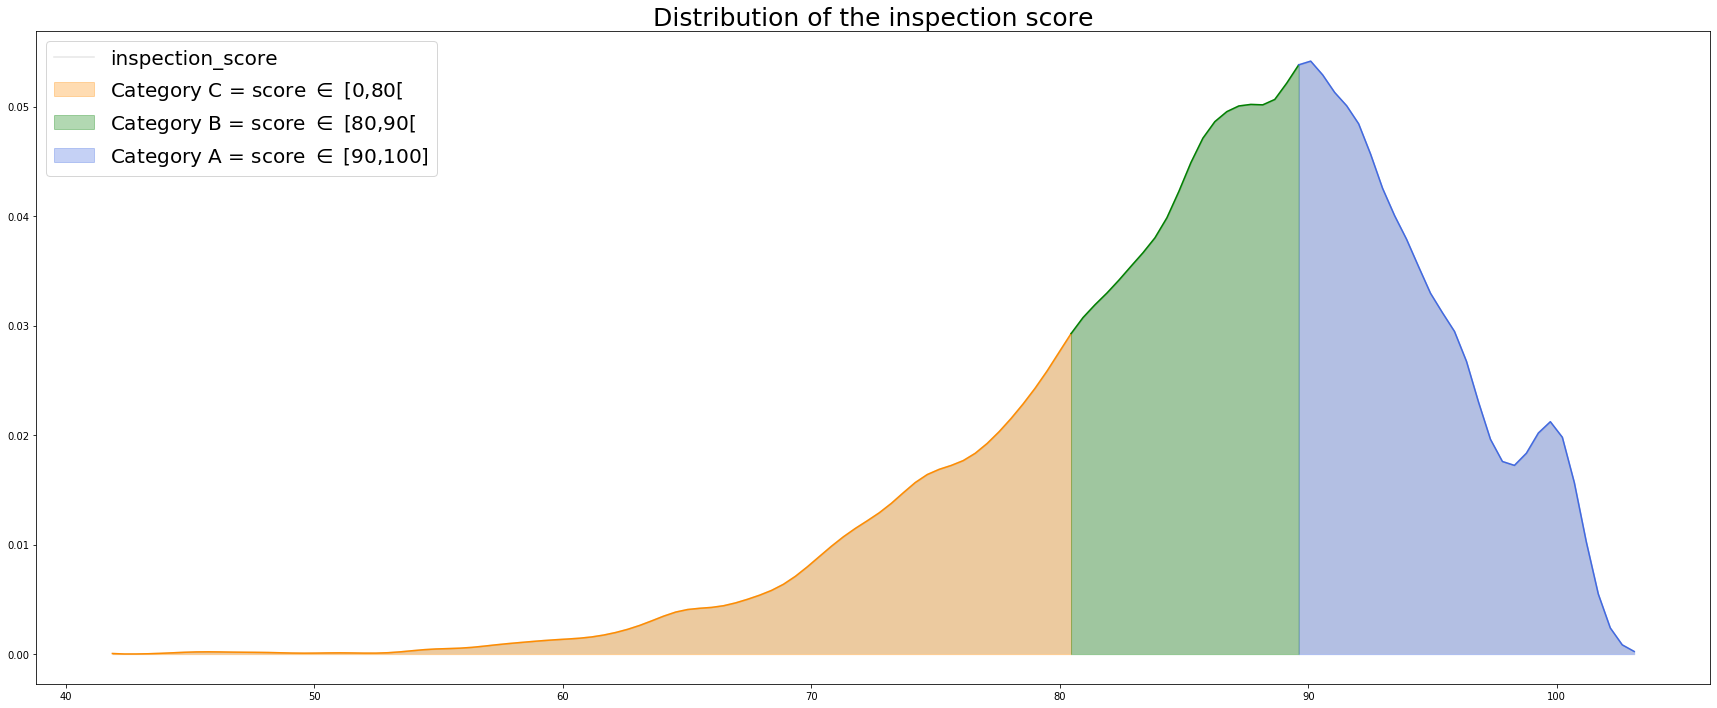

In [31]:
labels = ['Category A = score $\in$ [90,100]', 'Category B = score $\in$ [80,90[', 'Category C = score $\in$ [0,80[']
colors = ['royalblue', 'green', 'darkorange']

logRev = (data_hist['inspection_score'])
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.kdeplot(logRev, c='grey', shade=True, alpha=0.2)
x_d = ax.get_lines()[0].get_data()[0]
y_d = ax.get_lines()[0].get_data()[1]
plt.plot(x_d[np.where(x_d<=80.46)], y_d[np.where(x_d<=80.46)], c=colors[2])
plt.fill_between(x_d[np.where(x_d<=80.46)], y_d[np.where(x_d<=80.46)], y2=0,
                 color=colors[2], alpha=0.3, label=labels[2])
plt.plot(x_d[np.where((x_d>=80) & (x_d<=90))], y_d[np.where((x_d>=80) & (x_d<=90))], c=colors[1])
plt.fill_between(x_d[np.where((x_d>=80) & (x_d<=90))],
                 y_d[np.where((x_d>=80) & (x_d<=90))],
                 y2=0, color=colors[1], alpha=0.3, label=labels[1])
plt.plot(x_d[np.where(x_d>=89.6)], y_d[np.where(x_d>=89.6)], c=colors[0])
plt.fill_between(x_d[np.where(x_d>=89.6)], y_d[np.where(x_d>=89.6)], y2=0,
                 color=colors[0], alpha=0.3, label=labels[0])
plt.legend(loc='upper left', fontsize=20)
plt.title('Distribution of the inspection score', fontsize=25)

In [32]:
data_hist['latitude'] = pd.to_numeric(data_hist['business_latitude'], downcast='float', errors='coerce')
data_hist['longitude'] = pd.to_numeric(data_hist['business_longitude'], downcast='float', errors='coerce')

def get_neighborhood(long, lat):
    point = Point(long, lat)
    for k in range(len(nbrhoods)):
        if point.within(nbrhoods.geometry[k]):
            return nbrhoods.nhood[k]

data_hist['neighborhood'] = list(map(lambda x, y: get_neighborhood(x,y), data_hist['longitude'], data_hist['latitude']))

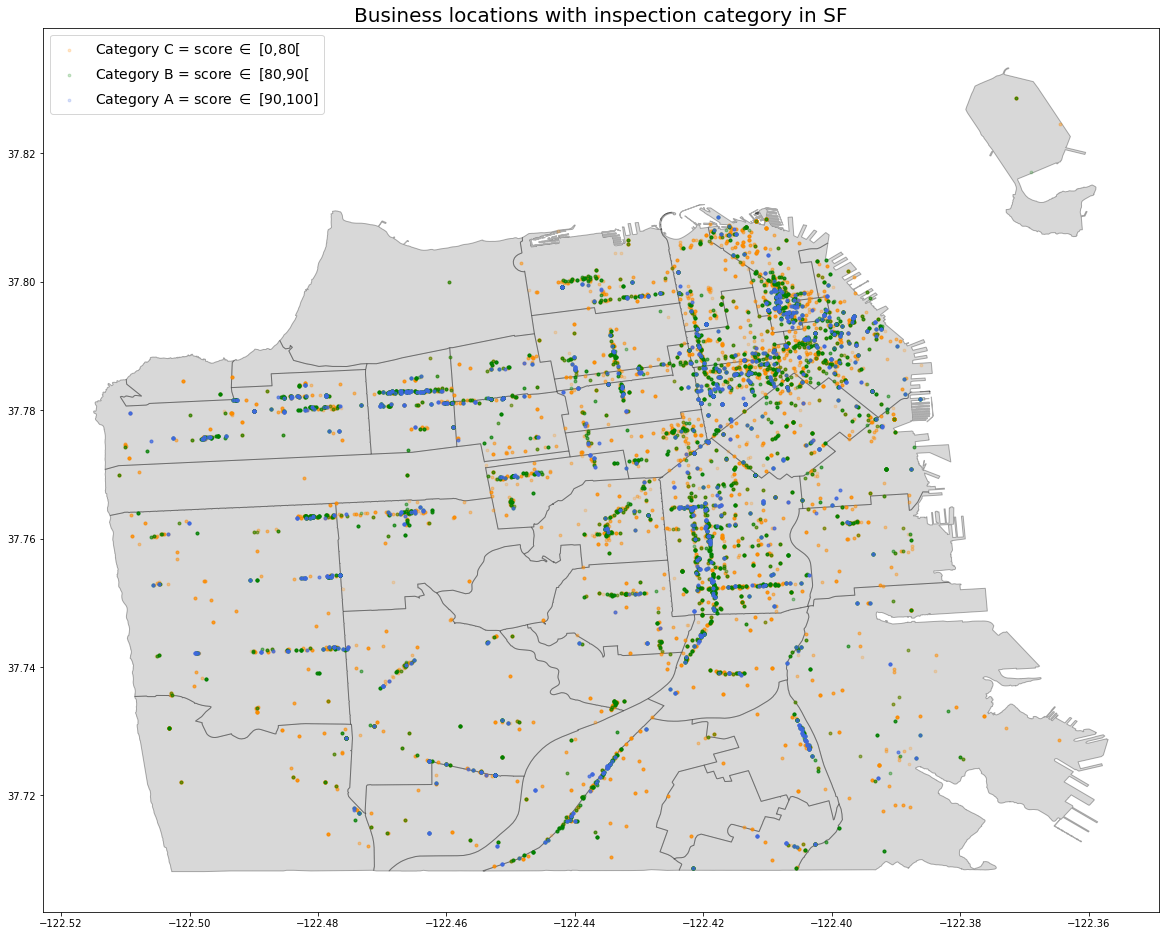

In [33]:
def category(note):
    if note == np.nan:
        return(0)
    elif (note < 80):
        return(1)
    elif (note >= 80) & (note < 90):
        return(2)
    elif (note >= 90):
        return(3)

data_hist['category'] = list(map(lambda x: category(x), data_hist['inspection_score']))
data_hist = data_hist[(data_hist['longitude'] <= -121.) & 
                (data_hist['latitude'] <= 37.84) & 
                (data_hist['latitude'] >= 37.70)]

gdf = geopandas.GeoDataFrame(
    data_hist, geometry=geopandas.points_from_xy(data_hist.longitude, data_hist.latitude))

fig, ax = plt.subplots(1, figsize=(20,20))
base = nbrhoods.plot(ax=ax, edgecolor='k', color='grey', alpha=0.3)
for j in range(2, -1, -1):
    gdf[gdf.category == j+1].plot(ax=base, marker="o", color=colors[j],
                 label=labels[j], alpha=0.2, markersize=8)
plt.legend(loc='upper left', fontsize=14)
ax.set_title("Business locations with inspection category in SF", fontsize=20)
plt.show()

One interesting thing is to aggregate those inspection scores for each neighbourhood.

AttributeError: module 'contextily' has no attribute 'add_basemap'

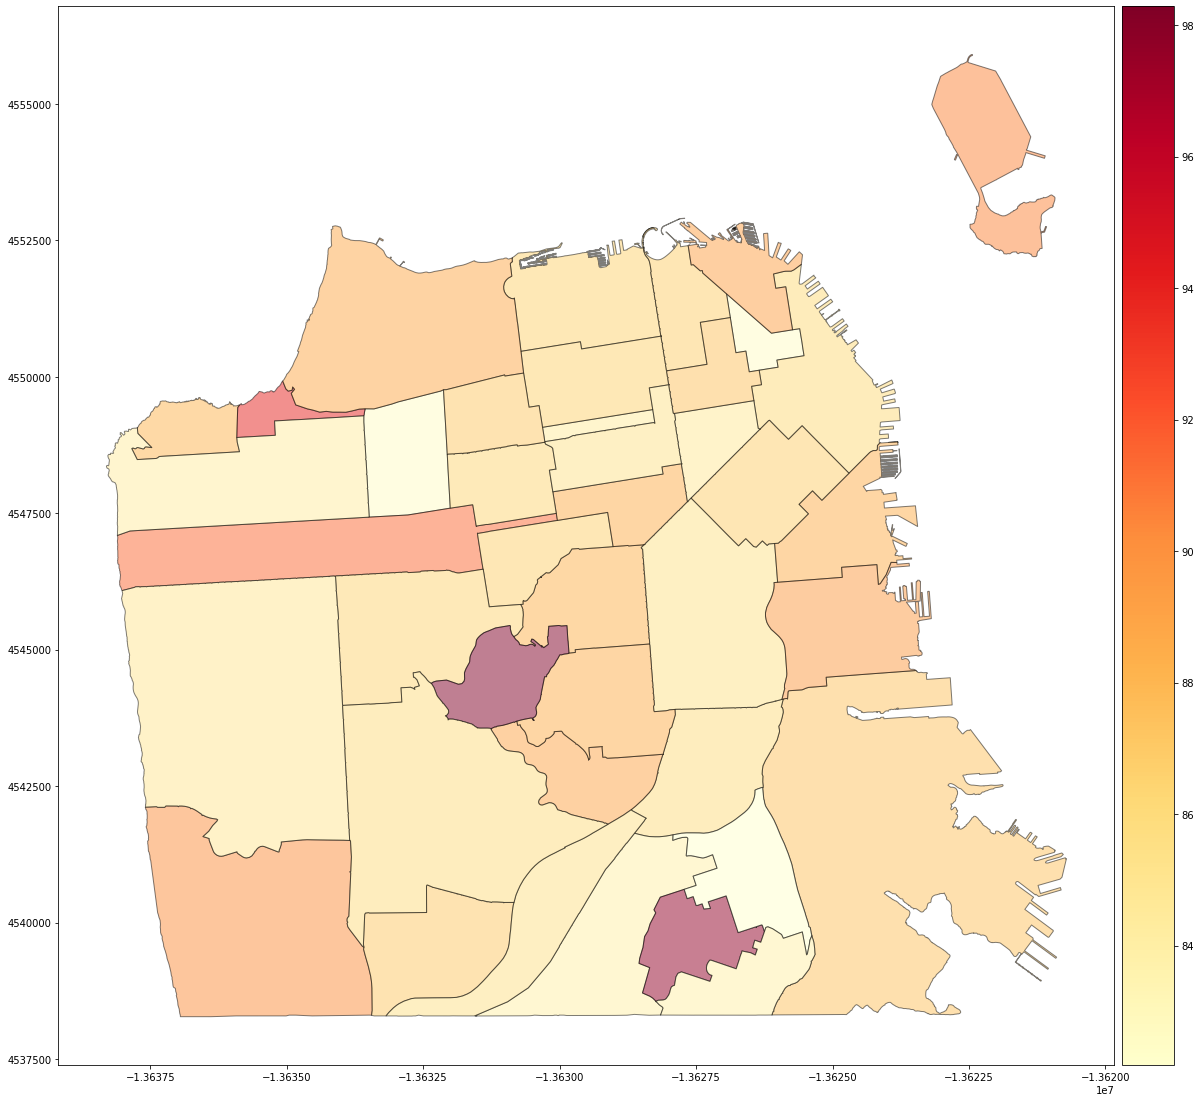

In [34]:
mean_inspec_by_nbrh_gdf = data_hist.groupby('neighborhood')['inspection_score'].mean().to_frame()
mean_inspec_by_nbrh_gdf.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
nbrhoods.merge(mean_inspec_by_nbrh_gdf, left_on='nhood', right_on='neighborhood')\
                        .to_crs(epsg=3857)\
                        .plot(ax=ax, alpha=0.5, edgecolor='k', 
                              cmap = 'YlOrRd', column='inspection_score', 
                              legend=True, cax=cax)
ctx.add_basemap(ax, zoom=14)
ax.set_title("Mean inspection score per Neighbourhood", fontsize = 20)
plt.show()

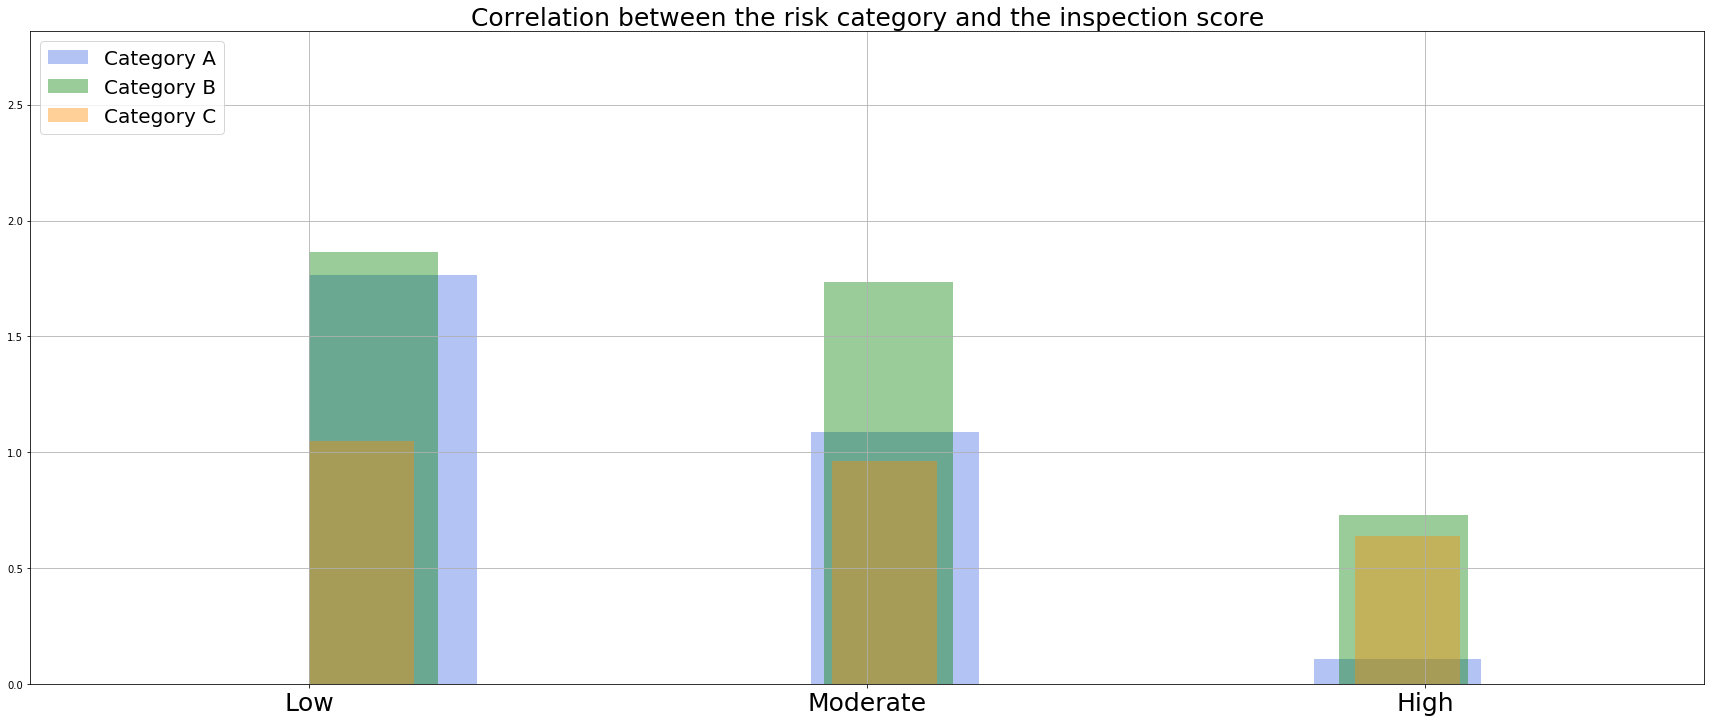

In [35]:
## encoding the risk category and inspection category
insp_categ = data_hist['inspection_score'].apply(lambda x: 0 if x>=90 else (1 if 80<=x<90 else 2))
data_hist['inspection_category'] = insp_categ
risk_cat_enc = data_hist['risk_category'].apply(lambda x: 0 if x=='Low Risk' else 
                                                (1 if x=='Moderate Risk' else (2 if x=='High Risk' else 3)))
data_hist['risk_cat_enc']=risk_cat_enc

fig, ax = plt.subplots(figsize=(30, 12))
# plotting the dependencies
data_hist['risk_cat_enc'].where(data_hist['inspection_category']==0
                                ).hist(alpha=0.4, label='Category A', density=1, bins=10, color='royalblue')
data_hist['risk_cat_enc'].where(data_hist['inspection_category']==1
                                ).hist(alpha=0.4, label='Category B', density=1, bins=13, color='green')
data_hist['risk_cat_enc'].where(data_hist['inspection_category']==2
                                ).hist(alpha=0.4, label='Category C', density=1, bins=16, color='darkorange')
plt.xticks(np.arange(3), ('Low', 'Moderate', 'High'), fontsize=25)
plt.xlim(-0.5,2.5)
plt.legend(loc='upper left', fontsize=20)
plt.title('Correlation between the risk category and the inspection score', fontsize=25);

Therefore we can easily notice that the restaurants with the highest risk have indeed received lower inspection scores and reversely.

### TripAdvisor data

We can try to point out badly reviewed restaurants and thus neighbourhoods by plotting the average rating from the TripAdvisor dataset. However we must link this to the number of restaurants per neighbourhood while reading the following map (isolated restaurants can lead to higher or lower average for their neighbourhood).

In [36]:
def get_first(x):
            if isinstance(x, str):
                res = x.split(',')[0]
                return res
            else:
                return x

            
def merge(X):
    X.loc[:, 'business_name'] = X.loc[:, 'business_name'].str.lower()
    X.loc[:, 'business_name'] = X.loc[:, 'business_name'].str.replace('[^\w]','')
    X.loc[:, 'business_name'] = X.loc[:, 'business_name'].apply(lambda s : ''.join(filter(str.isalpha, s)))
    df = pd.merge(X, tripadvisor, left_on='business_name', right_on='name', how='left')
    return df


tripadvisor = pd.read_csv('data/external/tripadvisor_dataset.csv', low_memory=False)
tripadvisor.loc[:, 'name'] = tripadvisor.loc[:, 'name'].str.lower()
tripadvisor.loc[:, 'name'] = tripadvisor.loc[:, 'name'].str.replace('[^\w]','')
tripadvisor.loc[:, 'name'] = tripadvisor.loc[:, 'name'].apply(lambda s : ''.join(filter(str.isalpha, s)))
tripadvisor.drop_duplicates('name', inplace=True)
tripadvisor.loc[:, 'cuisines'] = tripadvisor.loc[:, 'cuisines'].apply(lambda x: get_first(x))
tripadvisor.loc[:, 'special_diets'] = tripadvisor.loc[:, 'special_diets'].apply(lambda x: get_first(x))
tripadvisor.loc[:, 'meals'] = tripadvisor.loc[:, 'meals'].apply(lambda x: get_first(x))
data_merged = merge(X_df)

C:\Users\Benjamin\Anaconda3\envs\datacamp\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


AttributeError: module 'contextily' has no attribute 'add_basemap'

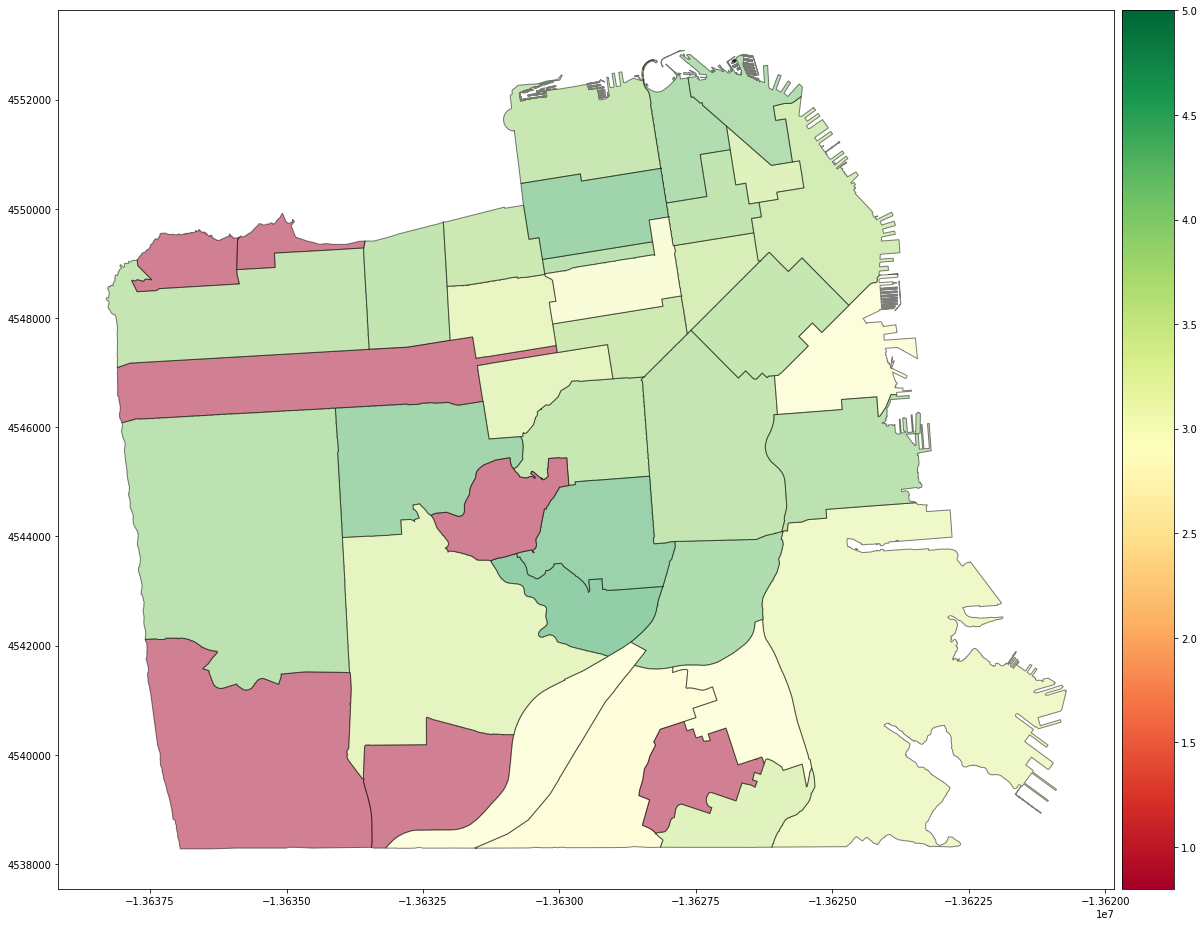

In [37]:
mean_rating_by_nbrh_gdf = data_merged.groupby('neighborhood')['rating'].mean().to_frame()
mean_rating_by_nbrh_gdf.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(20, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
nbrhoods.merge(mean_rating_by_nbrh_gdf, left_on='nhood', right_on='neighborhood')\
                        .to_crs(epsg=3857)\
                        .plot(ax=ax, alpha=0.5, edgecolor='k', 
                              cmap = 'RdYlGn', column='rating',
                              cax=cax, legend=True, vmax=5.0)
ctx.add_basemap(ax, zoom=14)
ax.set_title("Mean of TripAdvisor rating per Neighborhood", fontsize = 20)
plt.show()

We can first look at the distribution of the inspection score across our data. We highlight the three categories of classification depending on the inspection score received by the restaurant.

In [38]:
data_merged.columns

Index(['business_address', 'business_city', 'business_id', 'business_latitude',
       'business_location', 'business_longitude', 'business_name',
       'business_phone_number', 'business_postal_code', 'business_state',
       'full_adress', 'inspection_date', 'inspection_id', 'inspection_type',
       'risk_category', 'violation_description', 'violation_id',
       'neighborhood', 'link', 'name', 'rating', 'n_reviews', 'price_type',
       'location', 'borough', 'price_range', 'cuisines', 'special_diets',
       'meals', 'features', 'n_review_excellent', 'n_review_verygood',
       'n_review_average', 'n_review_poor', 'n_review_terrible',
       'list_reviews'],
      dtype='object')

In [47]:
data_merged = merge(data_hist)
data_merged.dropna(subset=['inspection_score'], inplace=True)
data_merged['cat_cuisines'] = data_merged['cuisines'].astype('category').cat.codes
data_merged['category_inspection'] = list(map(lambda x: category(x), data_merged['inspection_score']))
cat_price = pd.crosstab(data_merged['price_type'], data_merged['category_inspection']).apply(lambda r: r/r.sum(), axis=1)
cat_price.reset_index(inplace=True)
cat_price.columns = ['price_type', 'A', 'B', 'C']
cat_price['price_type'] = ['Other_category', 'cheap_eats', 'mid_range', 'fine_dining']
category_per_price = cat_price.transpose()
category_per_price.reset_index(inplace=True)
category_per_price.columns = category_per_price.iloc[0]
category_per_price.drop([0], inplace=True)
category_per_price

,price_type,Other_category,cheap_eats,mid_range,fine_dining
1,A,0.285266,0.225488,0.0185185,0.209467
2,B,0.445664,0.405926,0.396296,0.448006
3,C,0.26907,0.368586,0.585185,0.342527


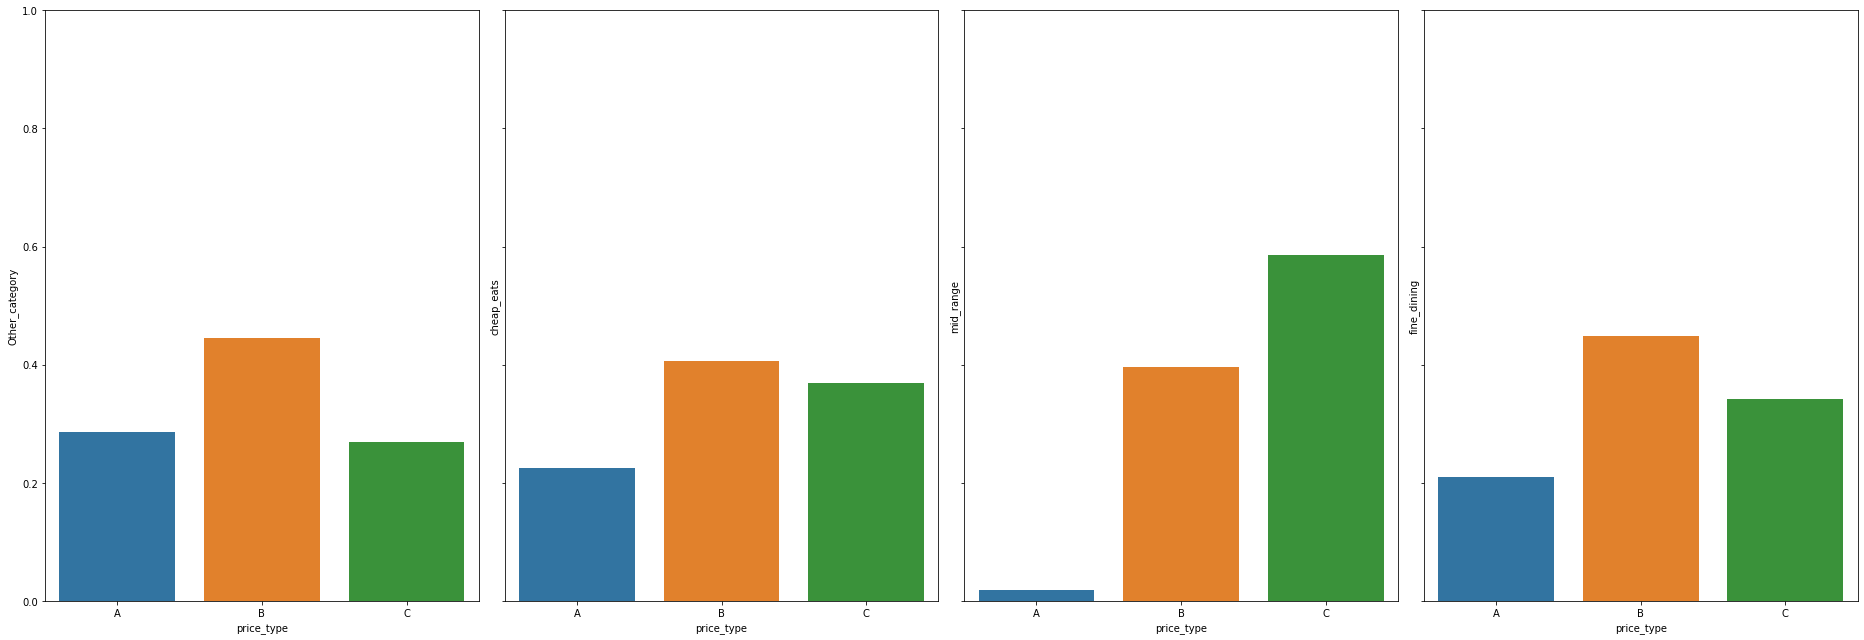

In [53]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 4, figsize=(26, 9), sharey=True)


sns.catplot(x='price_type', y='Other_category', data=category_per_price, kind='bar', ax=axes[0])
sns.catplot(x='price_type', y='cheap_eats', data=category_per_price, kind='bar', ax=axes[1])
sns.catplot(x='price_type', y='mid_range', data=category_per_price, kind='bar', ax=axes[2])
sns.catplot(x='price_type', y='fine_dining', data=category_per_price, kind='bar', ax=axes[3])
axes[0].set(ylim=(0.0, 1.0))

f.tight_layout()
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

We see that mid_range restaurants are more likely to have bad inspection. 

Now, we analyze the influence of the cuisine over several features of the dataset.

In [54]:
print("Most present cuisines in the dataset:\n",
      data_merged['cuisines'].value_counts(dropna=True)[0:6])

Most present cuisines in the dataset:
 American    2005
Chinese     1463
Cafe         904
Asian        835
Japanese     793
Mexican      645
Name: cuisines, dtype: int64


Its consequence over the rating on Tripadvisor is first analyzed.

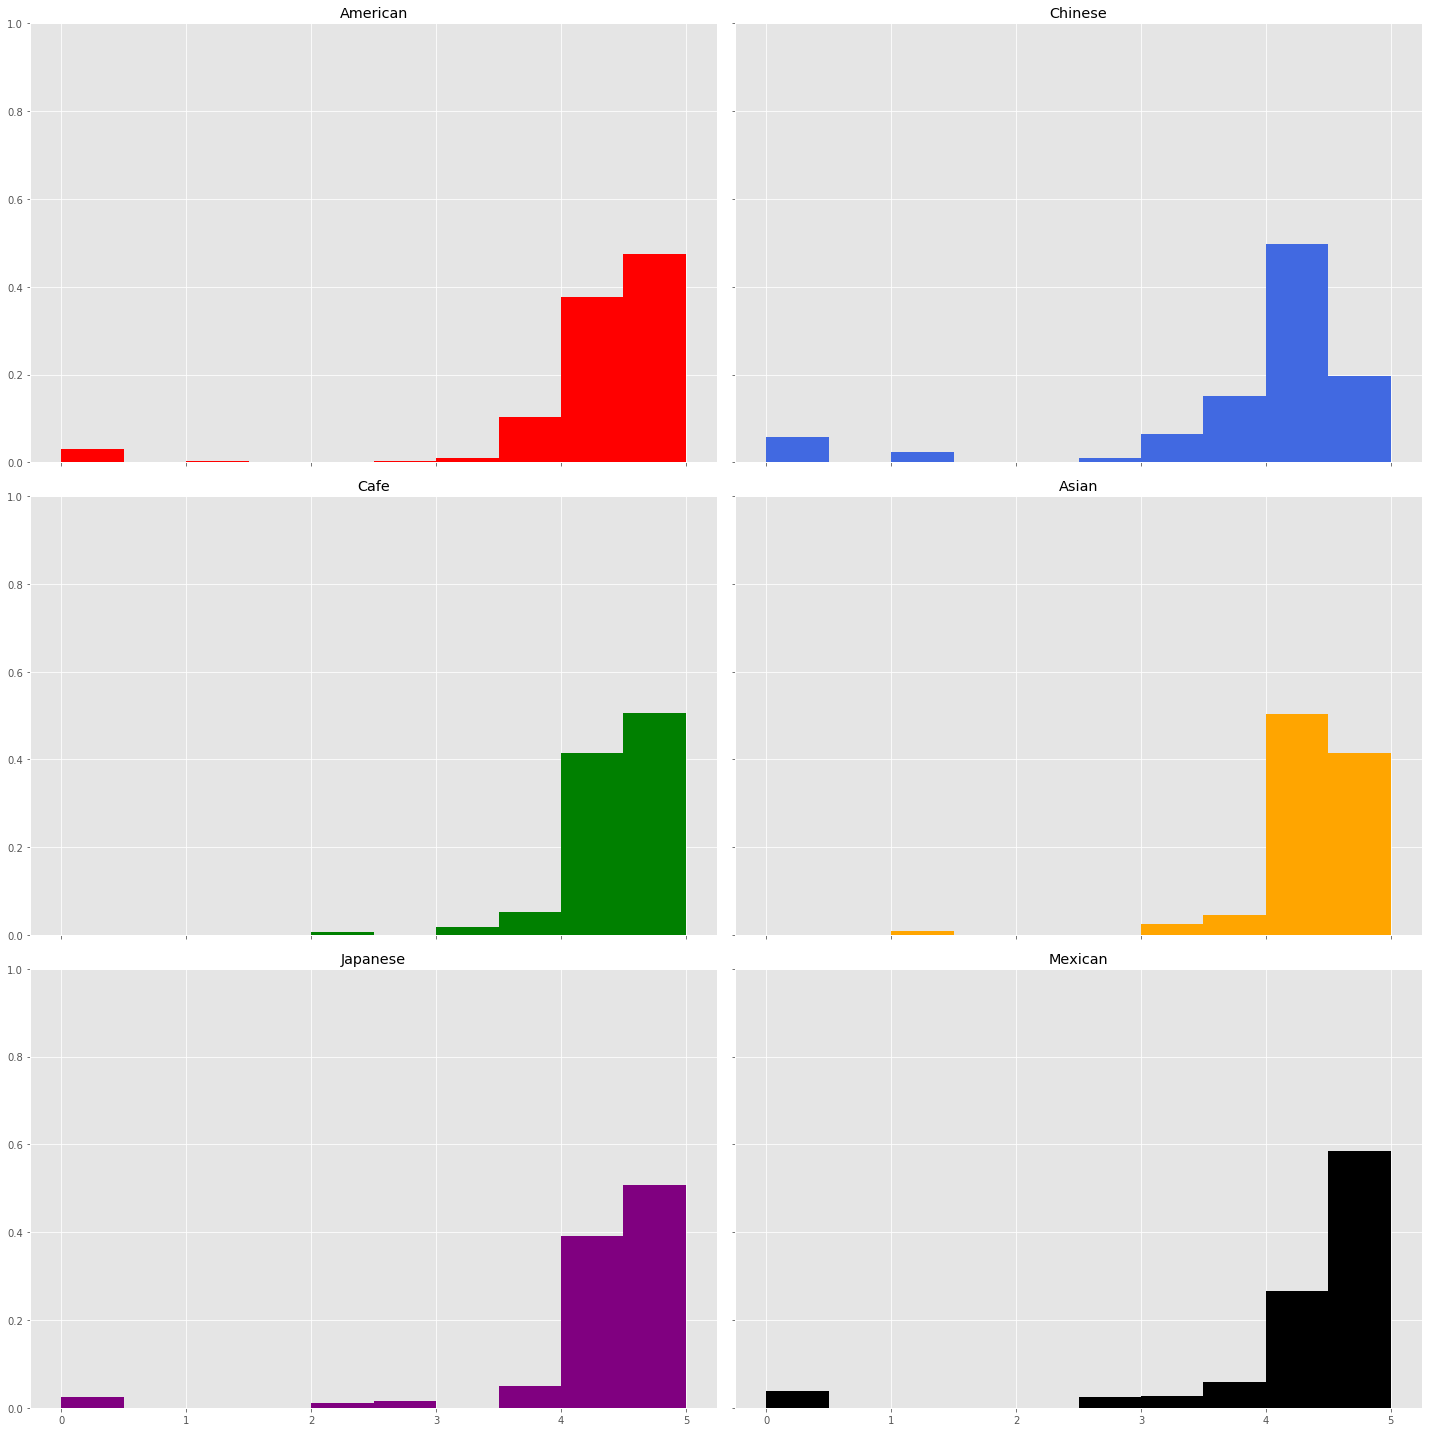

In [24]:
style.use('ggplot')

most_present_cuisines = data_merged['cat_cuisines'].value_counts(dropna=True).index.values[1:7]
df_cuisines_most_present = data_merged[data_merged['cat_cuisines'].isin(most_present_cuisines)]

colors = ['red', 'royalblue', 'green', 'orange', 'purple', 'black']

# Set up the figure
f, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, i in zip(axes.flat, range(6)):

    # Generate and plot a random bivariate dataset
    x, bins, p = ax.hist(df_cuisines_most_present[df_cuisines_most_present['cat_cuisines'] == most_present_cuisines[i]]['rating'],
                         color=colors[i],
                         density=True,
                         #label='rating '+str(1.+0.5*i),
                         bins=np.linspace(0,5,11),
                         # align='right'
                            )
    for item in p:
        item.set_height(item.get_height()/sum(x))
    ax.set_title(data_merged['cuisines'].value_counts(dropna=True).index.values[i])
    ax.set_ylim(0,1.)
f.tight_layout()

As we can see, American, Chinese and Mexican cuisines are more likely to have 0 ratings on trip advisor. However, American cuisine have more really good ratings compared to others.

We then analyze the influence of the cuisine over the inspection score.

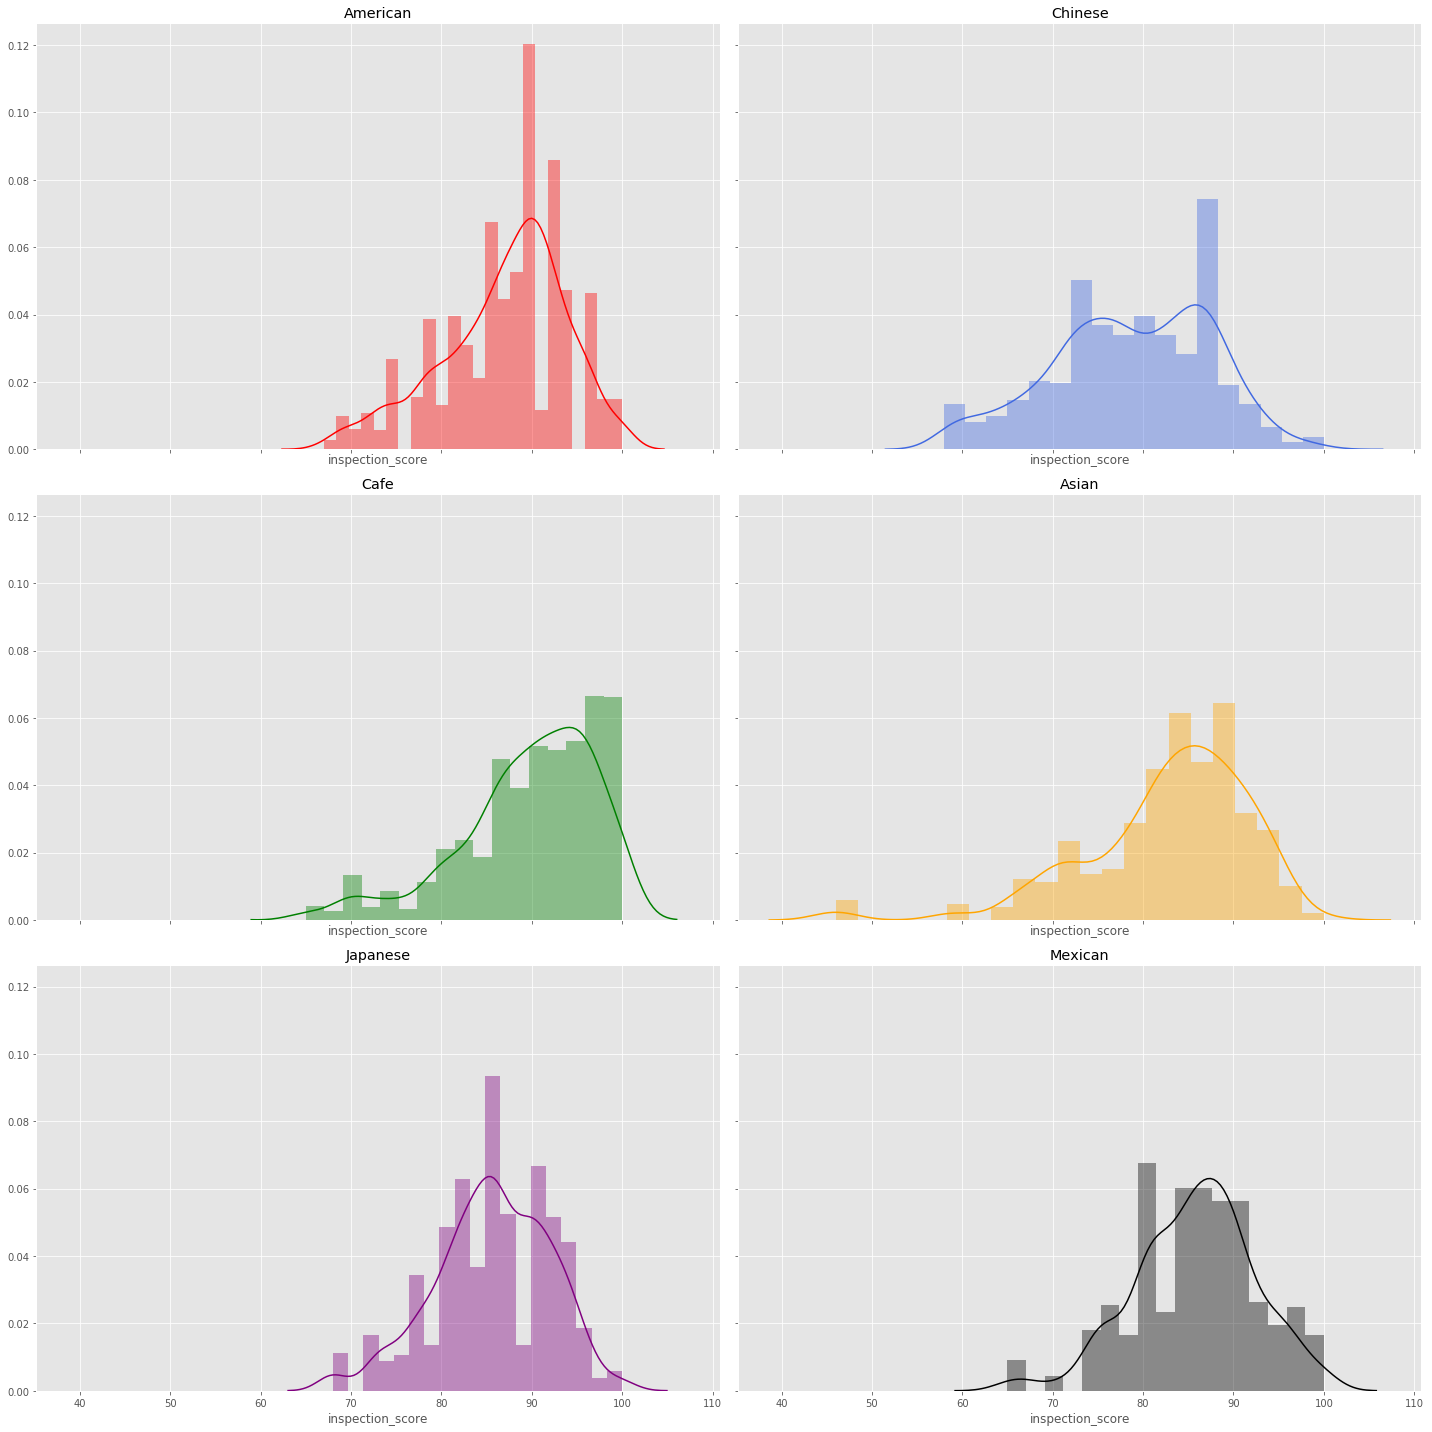

In [25]:
# Set up the figure
f, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, i in zip(axes.flat, range(6)):
    
    sns.distplot(df_cuisines_most_present[df_cuisines_most_present['cat_cuisines'] == most_present_cuisines[i]]['inspection_score'],
                 label=data_merged['cuisines'].value_counts().index.values[i],
                 norm_hist=True,
                 #bins=np.linspace(0,5,11),
                 color=colors[i], ax=ax)
    ax.set_title(data_merged['cuisines'].value_counts().index.values[i])
f.tight_layout()

The inspection score is influenced by the type of cuisine. Japanese restaurants have better inspection scores, Asian restaurants in general are more distributed and Mexican restaurants have some restaurants with really bad inspection scores.

#  <a style="color:#0131B4">III. Workflow</a>

In [26]:
X_df, y_array = get_train_data()
tripadvisor = pd.read_csv('data/external/tripadvisor_dataset.csv', low_memory=False)

## <a style="color:#0131B4">1. Feature Extractor</a>

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [28]:
def get_first(x):
            if isinstance(x, str):
                res = x.split(',')[0]
                return res
            else:
                return x

            
def merge(X):
    X.loc[:, 'business_name'] = X.loc[:, 'business_name'].str.lower()
    X.loc[:, 'business_name'] = X.loc[:, 'business_name'].str.replace('[^\w]','')
    X.loc[:, 'business_name'] = X.loc[:, 'business_name'].apply(lambda s : ''.join(filter(str.isalpha, s)))
    df = pd.merge(X, tripadvisor, left_on='business_name', right_on='name', how='left')
    return df


tripadvisor.loc[:, 'name'] = tripadvisor.loc[:, 'name'].str.lower()
tripadvisor.loc[:, 'name'] = tripadvisor.loc[:, 'name'].str.replace('[^\w]','')
tripadvisor.loc[:, 'name'] = tripadvisor.loc[:, 'name'].apply(lambda s : ''.join(filter(str.isalpha, s)))
tripadvisor.drop_duplicates('name', inplace=True)
tripadvisor.loc[:, 'cuisines'] = tripadvisor.loc[:, 'cuisines'].apply(lambda x: get_first(x))
tripadvisor.loc[:, 'special_diets'] = tripadvisor.loc[:, 'special_diets'].apply(lambda x: get_first(x))
tripadvisor.loc[:, 'meals'] = tripadvisor.loc[:, 'meals'].apply(lambda x: get_first(x))
X_df = merge(X_df)

In [29]:
def lat_long(X):
    latitude = pd.to_numeric(X['business_latitude'], downcast='float', errors='coerce')
    longitude = pd.to_numeric(X['business_longitude'], downcast='float', errors='coerce')
    return np.c_[latitude.values[:, np.newaxis], longitude.values[:, np.newaxis]]

lat_long_transformer = FunctionTransformer(lat_long, validate=False)

In [30]:
def zipcodes(X):
    zipcode_nums = pd.to_numeric(X['business_postal_code'], errors='coerce')
    return zipcode_nums.values[:, np.newaxis]

zipcode_transformer = FunctionTransformer(zipcodes, validate=False)

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median'))
])

In [32]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline

num_cols = ['business_id', 'rating', 'n_review_excellent', 'n_review_verygood', 
            'n_review_average', 'n_review_poor', 'n_review_terrible']
cat_cols = ['inspection_type', 'risk_category', 'price_type', 'cuisines', 
            'special_diets', 'meals']
lat_long_cols = ['business_latitude', 'business_longitude']
zipcode_col = ['business_postal_code']
drop_cols = ['business_address', 'business_city', 'business_location',
             'business_name', 'business_phone_number', 'list_reviews',
             'business_state', 'full_adress', 'inspection_date', 'inspection_id',
             'neighborhood', 'violation_description', 'violation_id', 'link', 
             'name', 'location', 'borough', 'price_range', 'features']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_comp = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
        ('lat_long', make_pipeline(lat_long_transformer, SimpleImputer(strategy='median')), lat_long_cols),
        ('zipcode', make_pipeline(zipcode_transformer, SimpleImputer(strategy='median')), zipcode_col),
        ('drop cols', 'drop', drop_cols),
    ])

## <a style="color:#0131B4">2. Regressor</a>

We will use a Random Forest Regressor model for the baseline model

In [33]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=12)

## <a style="color:#0131B4">3. Evaluation</a>

Before we can test our model, we need to define our unique scoring function:

In [34]:
from sklearn.metrics import make_scorer

def loss(y_true, y_pred):
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    penalization = 1.5*(y_pred > y_true) + 1*(y_pred <= y_true)
    loss = np.sqrt(np.mean((y_true - y_pred)**2*penalization))
    return loss
    
restaurant_loss = make_scorer(loss, greater_is_better=False)

Now we can test our model.

## <a style="color:#0131B4">4. Cross-Validation</a>

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupShuffleSplit

clf = Pipeline(steps=[
    ('preprocessing', preprocessor_comp),
    ('classifier', regressor)])

cv = GroupShuffleSplit(n_splits=8, test_size=0.25)

scores_Xdf = -cross_val_score(clf, X_df, y_array, cv=cv, scoring=restaurant_loss, groups=X_df['business_id'], n_jobs=2)

print("mean: %e (+/- %e)" % (scores_Xdf.mean(), scores_Xdf.std()))

mean: 6.151217e+00 (+/- 2.353898e-01)


#  <a style="color:#0131B4">IV. Submission</a>

First, ensure that `ramp-worflow` is installed (see the [github repo](https://github.com/paris-saclay-cds/ramp-workflow) for installation instructions). 

Now you can use `ramp_test_submission`. This command will test on files in [`submissions/starting_kit`](/submissions/starting_kit) by default. To specify testing on a different folder use the flag `--submission`. For example to run the test on `submissions/my_model` use: `ramp_test_submission --submission my_model`.

In [36]:
!ramp_test_submission --submission starting_kit

Testing Prediction of inspection score
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  Score error  F1 score      time
	train         2.91      0.92  0.266830
	valid         6.07      0.77  0.033177
	test          6.12      0.74  0.017426
CV fold 1
	score  Score error  F1 score      time
	train         3.05      0.92  0.231642
	valid         5.98      0.77  0.032233
	test          6.17      0.74  0.018309
CV fold 2
	score  Score error  F1 score      time
	train         2.98      0.92  0.212407
	valid         6.38      0.76  0.030998
	test          6.20      0.73  0.015981
CV fold 3
	score  Score error  F1 score      time
	train         2.96      0.91  0.207370
	valid         6.28      0.75  0.031471
	test          6.10      0.73  0.015839
CV fold 4
	score  Score error  F1 score      time
	train         2.95      0.92  0.253298
	valid         6.00      0.71  0.082658
	test          6.05      0.74  0.034769
CV fold 5
	sc